In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from datetime import datetime as dt
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
import time
import math
from scipy import stats, polyval

In [2]:
#파일 용량 줄이기
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
                    
            elif str(col_type)[:3] == 'flo':
                
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
             
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
# def fileopen(path, col, parse):
def fileopen(path, col, parse):
#     df1 = pd.read_csv(path, usecols = col, parse_dates=[parse])
    df1 = pd.read_csv(path, usecols = col)
#     df1 = reduce_mem_usage(df1,  verbose=True)
    gc.collect()
    return df1

In [17]:
new.to_csv("agg_new_0130.0.1.csv", index=False)

In [4]:
his = reduce_mem_usage(pd.read_csv("agg_0129_0.1.csv"))
new = reduce_mem_usage(pd.read_csv("agg_new_0130.0.1.csv"))

Mem. usage decreased to 115.80 Mb (72.4% reduction)
Mem. usage decreased to 53.65 Mb (69.7% reduction)


In [10]:
gc.collect()

3101

In [7]:
cols = []
for i in new.columns:
    name = i+"_new"
    cols.append(name)

In [11]:
pc = pd.merge(his[["card_id", "purchase_date_cycle_Y"]], new[["card_id","purchase_date_cycle_Y_new"]], on = "card_id")

In [14]:
new["purchase_date_cycle_Y_new"] = new["purchase_date_uptolastday_new"]/new["card_count_Y_new"]
new["card_count_avg_monthly_Y_new"] = new["purchase_date_usemonth_new"]/new["card_count_Y_new"]

In [13]:
pc["purchase_date_cycle_Y_gap"] = pc["purchase_date_cycle_Y"] - pc["purchase_date_cycle_Y_new"]

In [16]:
new = new.merge(pc[["card_id", "purchase_date_cycle_Y_gap"]], on = "card_id")

In [18]:
train = reduce_mem_usage(pd.read_csv("train.csv"))

Mem. usage decreased to  4.04 Mb (56.2% reduction)


In [19]:
df1 = pd.merge(train, new, on = "card_id")

In [20]:
df1 = pd.merge(df1, his, on = "card_id")

In [21]:
len(df1)

179986

In [22]:
len(df1.columns)

254

In [25]:
corr = df1.corr()

## new와 history data의 구매주기 차이와 타겟값

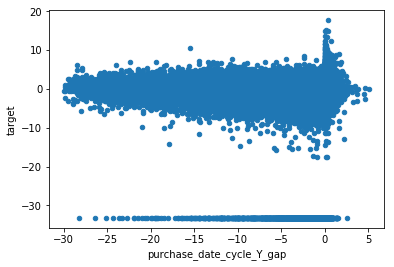

In [55]:
df1[["target", "purchase_date_cycle_Y_gap"]].plot(x = "purchase_date_cycle_Y_gap", y ="target", kind = "scatter")

## 지금부터는 new 다음 history 그래프

## 구매 기간&타겟

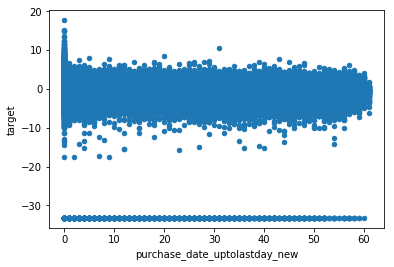

In [57]:
df1[["target", "purchase_date_uptolastday_new"]].plot(x = "purchase_date_uptolastday_new", y ="target", kind = "scatter")

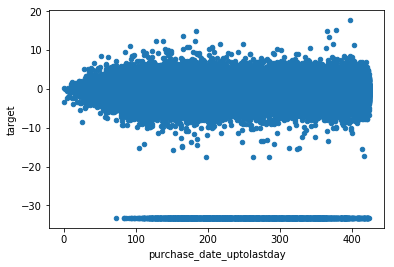

In [58]:
df1[["target", "purchase_date_uptolastday"]].plot(x = "purchase_date_uptolastday", y ="target", kind = "scatter")

## monthlag 기울기 구한거&타겟(히스토리만)

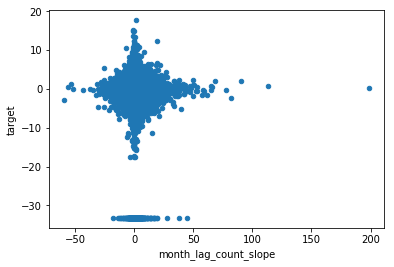

In [59]:
df1[["target", "month_lag_count_slope"]].plot(x = "month_lag_count_slope", y ="target", kind = "scatter")

## 사용횟수 &타겟

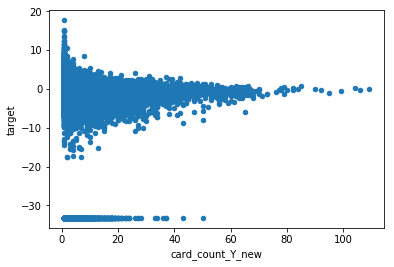

In [64]:
df1[["target", "card_count_Y_new"]].plot(x = "card_count_Y_new", y ="target", kind = "scatter")

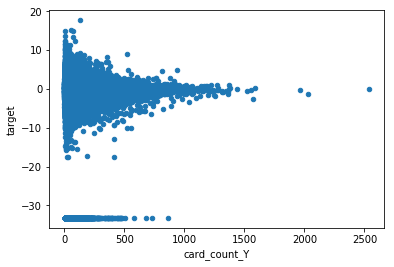

In [65]:
df1[["target", "card_count_Y"]].plot(x = "card_count_Y", y ="target", kind = "scatter")

## history(x축)와 new(y축) 사용량

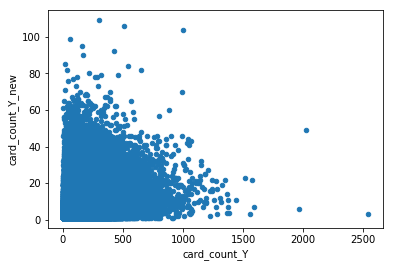

In [66]:
df1[["card_count_Y", "card_count_Y_new"]].plot(x = "card_count_Y", y ="card_count_Y_new", kind = "scatter")

## 주중 대비 주말 사용금액(나눈거)와 타겟

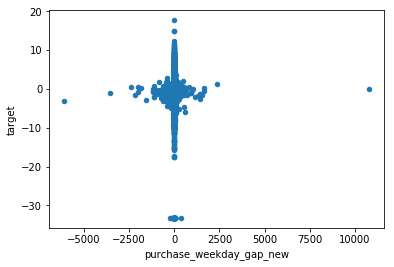

In [68]:
df1[["target", "purchase_weekday_gap_new"]].plot(x = "purchase_weekday_gap_new", y ="target", kind = "scatter")

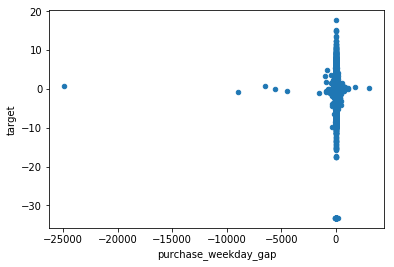

In [69]:
df1[["target", "purchase_weekday_gap"]].plot(x = "purchase_weekday_gap", y ="target", kind = "scatter")

## 주중 대비 주말 사용 횟수 

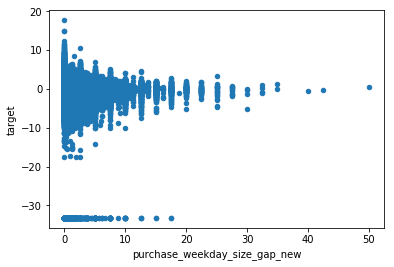

In [70]:
df1[["target", "purchase_weekday_size_gap_new"]].plot(x = "purchase_weekday_size_gap_new", y ="target", kind = "scatter")

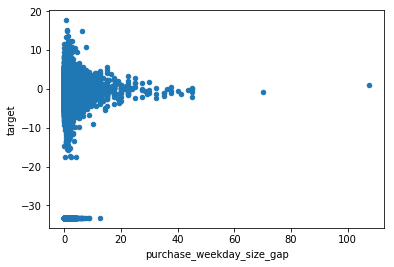

In [71]:
df1[["target", "purchase_weekday_size_gap"]].plot(x = "purchase_weekday_size_gap", y ="target", kind = "scatter")

## monthlag 1, 2(new)

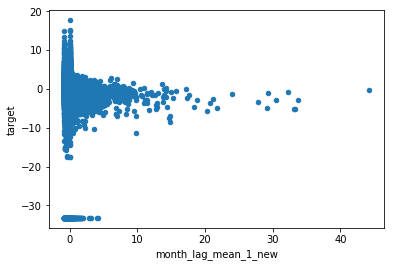

In [72]:
df1[["target", "month_lag_mean_1_new"]].plot(x = "month_lag_mean_1_new", y ="target", kind = "scatter")

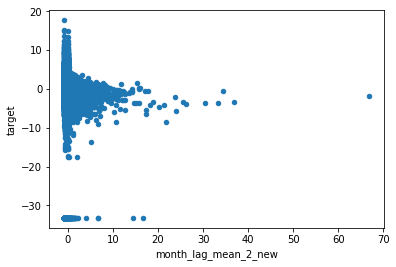

In [73]:
df1[["target", "month_lag_mean_2_new"]].plot(x = "month_lag_mean_2_new", y ="target", kind = "scatter")

# 21~24시 사용금액

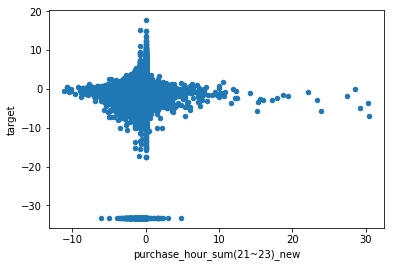

In [74]:
df1[["target", "purchase_hour_sum(21~23)_new"]].plot(x = "purchase_hour_sum(21~23)_new", y ="target", kind = "scatter")

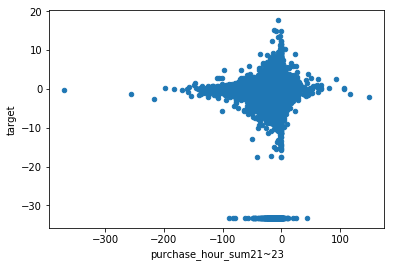

In [95]:
df1[["target", "purchase_hour_sum21~23"]].plot(x = "purchase_hour_sum21~23", y ="target", kind = "scatter")

## 18~21시 사용금액

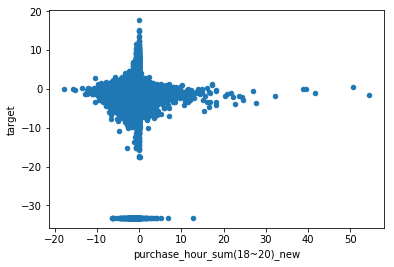

In [75]:
df1[["target", "purchase_hour_sum(18~20)_new"]].plot(x = "purchase_hour_sum(18~20)_new", y ="target", kind = "scatter")

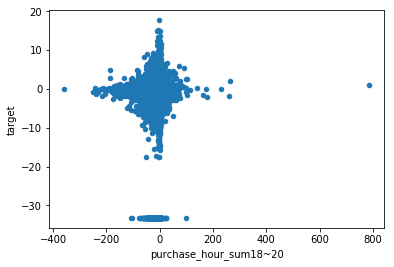

In [94]:
df1[["target", "purchase_hour_sum18~20"]].plot(x = "purchase_hour_sum18~20", y ="target", kind = "scatter")

## 0~3시 사용금액

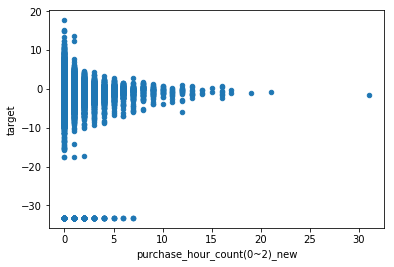

In [76]:
df1[["target", "purchase_hour_count(0~2)_new"]].plot(x = "purchase_hour_count(0~2)_new", y ="target", kind = "scatter")

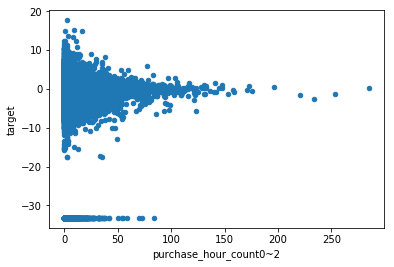

In [93]:
df1[["target", "purchase_hour_count0~2"]].plot(x = "purchase_hour_count0~2", y ="target", kind = "scatter")

# 할부 0

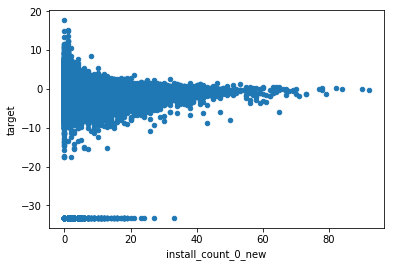

In [77]:
df1[["target", "install_count_0_new"]].plot(x = "install_count_0_new", y ="target", kind = "scatter")

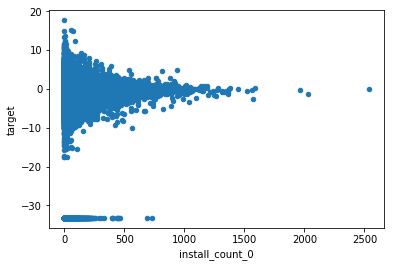

In [90]:
df1[["target", "install_count_0"]].plot(x = "install_count_0", y ="target", kind = "scatter")

## 할부 1

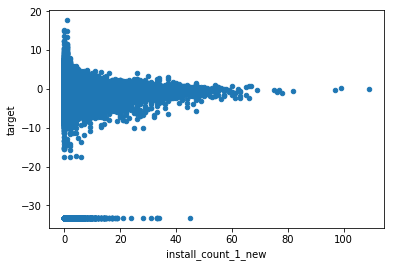

In [78]:
df1[["target", "install_count_1_new"]].plot(x = "install_count_1_new", y ="target", kind = "scatter")

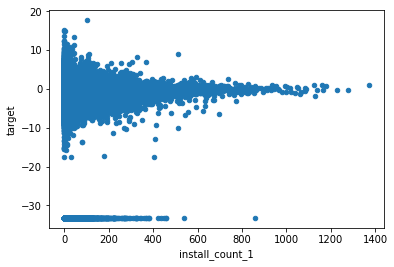

In [89]:
df1[["target", "install_count_1"]].plot(x = "install_count_1", y ="target", kind = "scatter")

## 할부 2~6개월

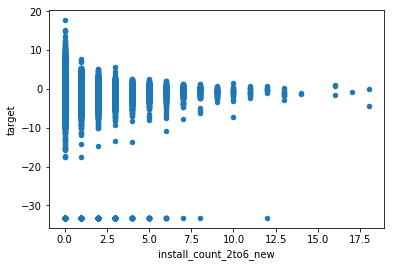

In [79]:
df1[["target", "install_count_2to6_new"]].plot(x = "install_count_2to6_new", y ="target", kind = "scatter")

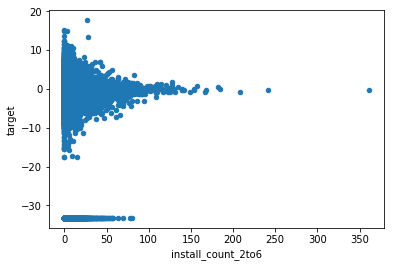

In [88]:
df1[["target", "install_count_2to6"]].plot(x = "install_count_2to6", y ="target", kind = "scatter")

## 할부 7~12개월

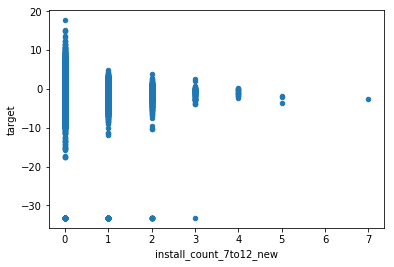

In [80]:
df1[["target", "install_count_7to12_new"]].plot(x = "install_count_7to12_new", y ="target", kind = "scatter")

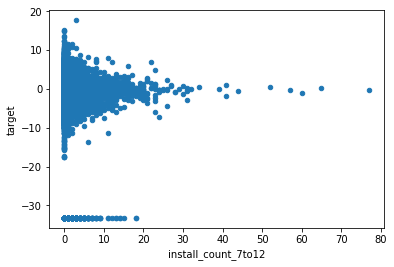

In [87]:
df1[["target", "install_count_7to12"]].plot(x = "install_count_7to12", y ="target", kind = "scatter")

## category1 N의 수

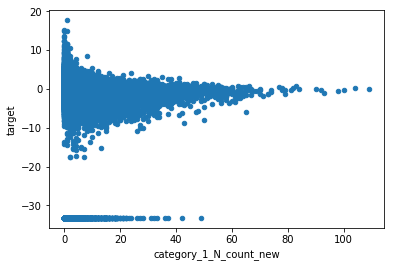

In [81]:
df1[["target", "category_1_N_count_new"]].plot(x = "category_1_N_count_new", y ="target", kind = "scatter")

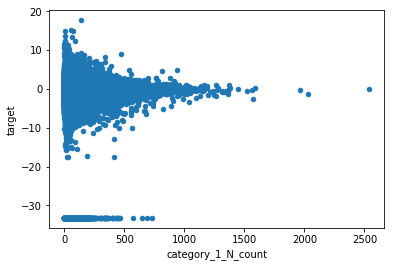

In [86]:
df1[["target", "category_1_N_count"]].plot(x = "category_1_N_count", y ="target", kind = "scatter")

## category1 Y의 수

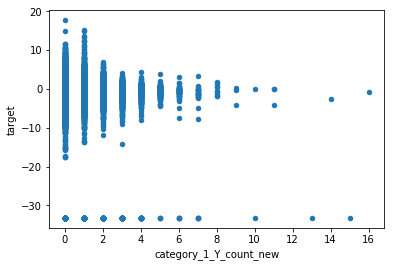

In [82]:
df1[["target", "category_1_Y_count_new"]].plot(x = "category_1_Y_count_new", y ="target", kind = "scatter")

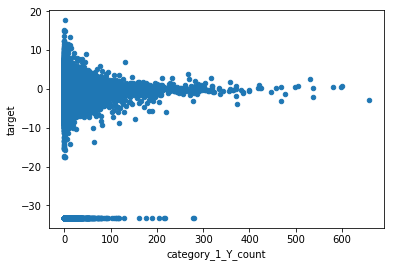

In [85]:
df1[["target", "category_1_Y_count"]].plot(x = "category_1_Y_count", y ="target", kind = "scatter")

## category1 N의 비율

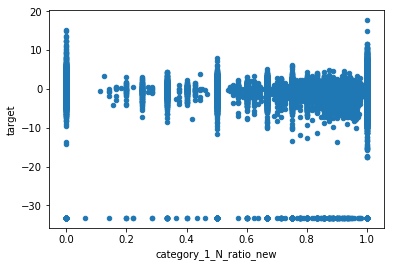

In [83]:
df1[["target", "category_1_N_ratio_new"]].plot(x = "category_1_N_ratio_new", y ="target", kind = "scatter")

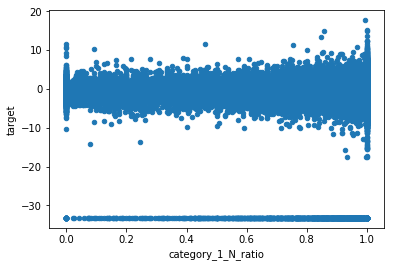

In [84]:
df1[["target", "category_1_N_ratio"]].plot(x = "category_1_N_ratio", y ="target", kind = "scatter")

## history데이터 monthlag -13~0

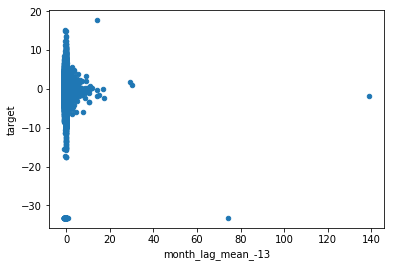

In [97]:
df1[["target", "month_lag_mean_-13"]].plot(x = "month_lag_mean_-13", y ="target", kind = "scatter")

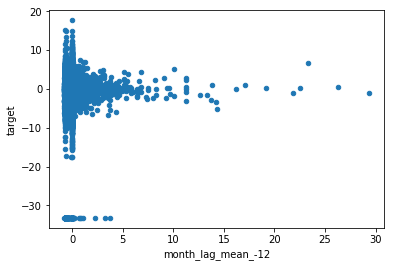

In [98]:
df1[["target", "month_lag_mean_-12"]].plot(x = "month_lag_mean_-12", y ="target", kind = "scatter")

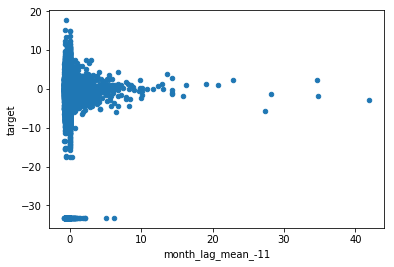

In [99]:
df1[["target", "month_lag_mean_-11"]].plot(x = "month_lag_mean_-11", y ="target", kind = "scatter")

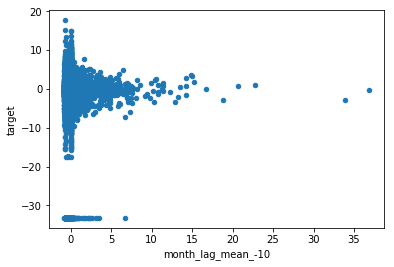

In [102]:
df1[["target", "month_lag_mean_-10"]].plot(x = "month_lag_mean_-10", y ="target", kind = "scatter")

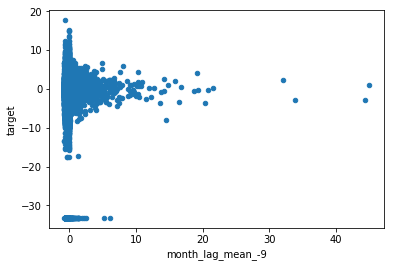

In [103]:
df1[["target", "month_lag_mean_-9"]].plot(x = "month_lag_mean_-9", y ="target", kind = "scatter")

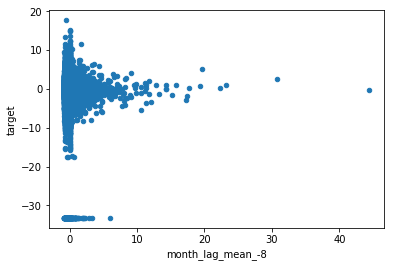

In [104]:
df1[["target", "month_lag_mean_-8"]].plot(x = "month_lag_mean_-8", y ="target", kind = "scatter")

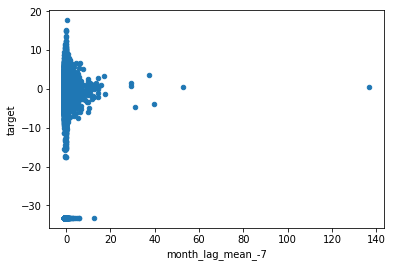

In [105]:
df1[["target", "month_lag_mean_-7"]].plot(x = "month_lag_mean_-7", y ="target", kind = "scatter")

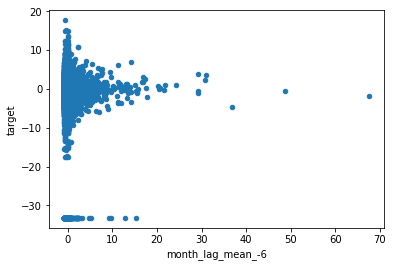

In [106]:
df1[["target", "month_lag_mean_-6"]].plot(x = "month_lag_mean_-6", y ="target", kind = "scatter")

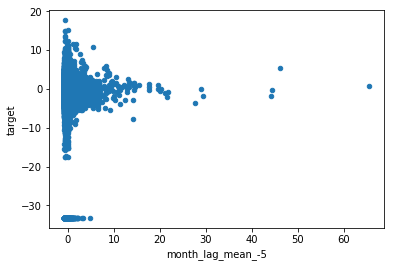

In [107]:
df1[["target", "month_lag_mean_-5"]].plot(x = "month_lag_mean_-5", y ="target", kind = "scatter")

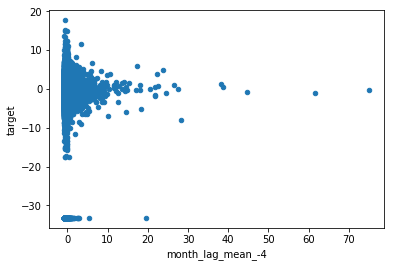

In [108]:
df1[["target", "month_lag_mean_-4"]].plot(x = "month_lag_mean_-4", y ="target", kind = "scatter")

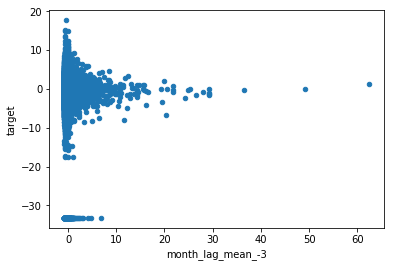

In [109]:
df1[["target", "month_lag_mean_-3"]].plot(x = "month_lag_mean_-3", y ="target", kind = "scatter")

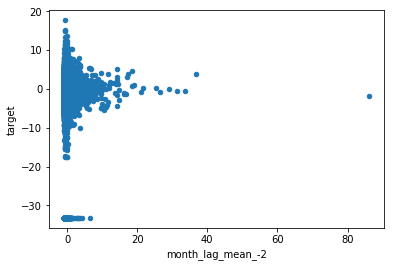

In [110]:
df1[["target", "month_lag_mean_-2"]].plot(x = "month_lag_mean_-2", y ="target", kind = "scatter")

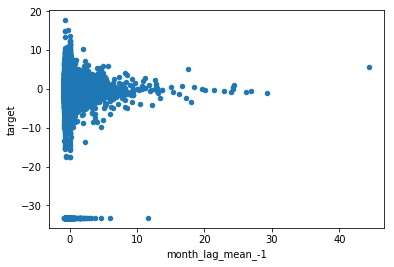

In [111]:
df1[["target", "month_lag_mean_-1"]].plot(x = "month_lag_mean_-1", y ="target", kind = "scatter")

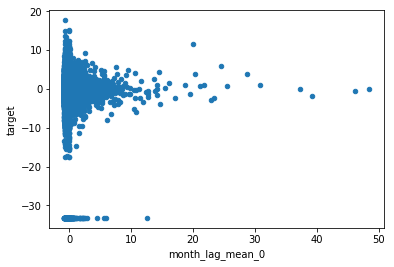

In [112]:
df1[["target", "month_lag_mean_0"]].plot(x = "month_lag_mean_0", y ="target", kind = "scatter")